In [ ]:
import torch
data = torch.randn([1, 25088])

In [ ]:
x1 = torch.concat([data, torch.zeros([1, 512])], dim=1)
x2 = data

y1 = torch.stft(x1, 512, hop_length=256, return_complex=True)
y2 = torch.stft(x2, 512, hop_length=256, return_complex=True)
y_ = torch.stft(torch.concat([x2[:, 24832:], torch.zeros([1, 256])], dim=1), 512, hop_length=256, return_complex=True, center=False)
y2 = torch.concat([y2[:,:, :-1], y_, torch.zeros([1, 257, y1.shape[2]-y2.shape[2]])], dim=2)
# y2 = torch.concat([y2, torch.zeros([1, 257, y1.shape[2]-y2.shape[2]])], dim=2)

In [ ]:
print(torch.sum(torch.abs(torch.abs(y1[:,:, 99]) - torch.abs(y2[:,:, 99]))))

In [ ]:
print(torch.sum(torch.abs(torch.abs(y1) - torch.abs(y2))))

In [ ]:
x1 = torch.concat([data, torch.zeros([1, 512])], dim=1)
x2 = data

y1 = torch.stft(x1, 512, hop_length=256, return_complex=True, center=False)
y2 = torch.stft(x2, 512, hop_length=256, return_complex=True, center=False)
y_ = torch.stft(torch.concat([x2[:, 24832:], torch.zeros([1, 256])], dim=1), 512, hop_length=256, return_complex=True, center=False)
y2 = torch.concat([y2, y_, torch.zeros([1, 257, y1.shape[2]-y2.shape[2]-1])], dim=2)
print(torch.sum(torch.abs(torch.abs(y1) - torch.abs(y2))))

In [ ]:
import time
from progressbar import ProgressBar, Percentage, Bar, Timer, ETA

widgets = ['Progress: ',Percentage(), ' ', Bar('#'),' ', Timer(),
           ' ', ETA()]
progress = ProgressBar(widgets=widgets).start()
for i in progress(range(100)):
    time.sleep(0.04)

In [ ]:
with open("wav_polqa.list", "r", encoding="utf-8") as f:
    li = f.read().splitlines()

import random
random.shuffle(li)

li_ = li[:60000]
with open("wav_polqa_big.list", "w", encoding="utf-8") as f:
    for l in li_:
        f.write(l+"\n")


In [ ]:
from trainer_utils import EarlyStopping, Args
import time
x = 10
args = Args(model_type="")
print(args.patience)
early_stopping = EarlyStopping(args.patience, args.delta_loss)
for i in range(20):
    time.sleep(0.1)
    if i < 5:
        x -= 0.1
    else:
        x += 1e-4
    print(x)
    if early_stopping(x):
        print("Early stopping")
        break

In [ ]:
with open("wav_polqa.list", "r", encoding="utf-8") as f:
    li = f.read().splitlines()

polqa = [float(l.split(",")[1]) for l in li]


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号
plt.rcParams['font.size'] = "14.0"
dpi = 300
polqa = np.array(polqa)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']  # 每一块的颜色
part = [len(polqa[(polqa>=i) & (polqa < (i + 1))]) for i in range(1,5)]
plt.figure(dpi=100)
plt.pie(part, labels=["1-2", "2-3", "3-4", "4-5"], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("MOS分数分布")
plt.tight_layout()
plt.savefig("images/MOS分数分布图.png", dpi=dpi)

In [ ]:
with open("wav_polqa.list", "r", encoding="utf-8") as f:
    li = f.read().splitlines()

polqa = [float(l.split(",")[1]) for l in li]

In [ ]:
import numpy as np
step = 20
dis_num = np.zeros([int(400 / step)])
for p in polqa:
    idx = (int(p * 100) - 100) // step
    dis_num[idx] += 1
print(dis_num)

In [ ]:
dis_prop = max(dis_num) / dis_num
np.sqrt(dis_prop)

In [ ]:
from trainer_utils import plot_metric
import numpy as np
path = r"D:\work\speechEnhancement\speechQuality\QualityNetPOLQA\results\dpcrn_qsehasa20240518_134721\data\train_metric.npy"
data = np.load(path, allow_pickle=True).item()
plot_metric({"train_loss": data['train_loss'], "valid_loss": data["valid_loss"]},
                                  title="train and valid loss")

In [ ]:
import torch

model = torch.load(r"D:\work\speechEnhancement\speechQuality\QualityNetPOLQA\models\dpcrn_qsehasa20240518_134721\best.pt")
model.eval()


In [18]:
from utils import seed_everything
import torch
import random
import numpy as np

seed_everything(42)

In [24]:
print(torch.randn((4, 8)))
print(np.random.rand(4, 8))

In [24]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
x = np.random.rand(10)

class dataset(Dataset):
    def __init__(self, x):
        self.x = x
    def __getitem__(self, idx):
        return self.x[idx]
    
    def __len__(self):
        return len(self.x)

In [38]:
d = dataset(x=x)
l = DataLoader(d, batch_size=4, shuffle=False)
print(len(l))
# i_l = iter(l)
# for i in range(20):
#     try:
#         y = next(i_l)
#     except StopIteration:
#         i_l = iter(l)
#         y = next(i_l)
#     print(y)
# from trainer_utils import LoaderIterator

# i_l = LoaderIterator(l)
# for i in range(20):
#     print(i_l())

for i in range(20):
    for j in l:
        print(j)
        break

In [ ]:
from utils import get_logging

logging = get_logging("log.txt")
logging.info("hello")
logging.info("hello")
logging.info("hello")

In [1]:
from torch.utils.tensorboard import SummaryWriter
import torch
summary = SummaryWriter("runs/temp")

from DPCRN import dpcrn

x = torch.randn([4, 2, 128, 257])
model = dpcrn()

summary.add_graph(model, x)

In [1]:
from utils import save_graph
from models import CnnMAttn
import torch
dummy_input = torch.rand([1, 512, 257])
model = CnnMAttn()
save_graph(model, dummy_input, "runs/temp")

In [34]:
import torch
import torchsummary
import torchinfo
from torch.utils.tensorboard import SummaryWriter
from models import CnnMAttn
model = CnnMAttn()
writer = SummaryWriter("runs/temp")

# text = """
# 123
# 456
# """
# writer.add_text("model info", text)
# print(torchinfo.summary(model, input_size=(4, 512, 257)))

# a = torchinfo.summary(model, input_size=(4, 512, 257))
# print(a)

import os
from PIL import Image, ImageDraw, ImageFont

summary = torchinfo.summary(model, col_names=("output_size", "num_params", "kernel_size"), row_settings=("depth","ascii_only"), input_size=(4, 512, 257))
text = str(summary)
width = summary.formatting.col_width * len(summary.formatting.col_names) * 16
height = len(summary.summary_list) * 24 + 100
im = Image.new("RGB", (width, height), (255, 255, 255))
dr = ImageDraw.Draw(im)
font = ImageFont.truetype(os.path.join("C:/Windows/fonts", "consola.ttf"), 16)

dr.text((10, 5), text, font=font,  fill="#000000")
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(width/200, height/200), dpi=300)
plt.imshow(im)
writer.add_figure("model1", fig)


In [ ]:
from models import HASANet
import torch

model = torch.load("models/hasa_cp20240527_001840/final.pt")

In [6]:
import torch
from DPCRN import dpcrn
from trainer_utils import load_dataset_se
model = torch.load("models/dpcrn_se20240518_224558/final.pt")
model_qn = torch.load("models/hasa_cp_qn20240529_214354/final.pt")
train_dataset, valid_dataset, test_dataset = load_dataset_se("wav_train_se.list", (0.8, 0.1, 0.1), 512, 256, 2)

x, _, y, _ = train_dataset[2]
print(torch.mean(torch.abs(torch.abs(x) - torch.abs(y))))
model = model.to("cpu")
model_qn = model_qn.to("cpu")
y_pred = model(x.unsqueeze(0)).cpu().squeeze(0)
print(torch.mean(torch.abs(torch.abs(y_pred) - torch.abs(y))))

tensor(0.)
tensor(0.0074, grad_fn=<MeanBackward0>)


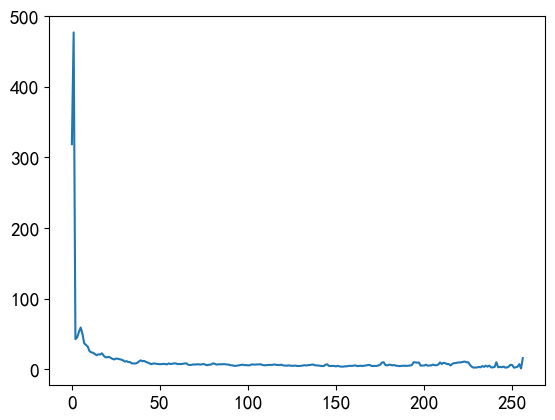

In [7]:
x_ = torch.norm(x, dim=0)
y_ = torch.norm(y, dim=0)
y_pred_ = torch.norm(y_pred, dim=0)
diff = torch.abs((y_ - y_pred_))
s_diff = torch.sum(diff ,dim=0).detach().numpy()
import matplotlib.pyplot as plt

plt.plot(s_diff)

In [ ]:
import torch.nn as nn
class HASANet(nn.Module):
    """
    input_size: 257
    hidden_size: 100
    num_layers: 1
    dropout: 0
    linear_output: 128
    act_fn: 'relu'
    """

    def __init__(self):
        super(HASANet, self).__init__()
        hidden_size = 100
        num_layers = 1
        dropout = 0.
        linear_output = 128
        self.blstm = nn.LSTM(input_size=257,
                             hidden_size=hidden_size,
                             num_layers=num_layers,
                             dropout=dropout,
                             bidirectional=True,
                             batch_first=True)
        self.linear1 = nn.Linear(hidden_size * 2, linear_output, bias=True)
        self.act_fn = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
        self.hasqiAtt_layer = nn.MultiheadAttention(linear_output, num_heads=8)
        self.ln = nn.LayerNorm(linear_output)
        self.hasqiframe_score = nn.Linear(linear_output, 1, bias=True)
        # self.act = nn.LeakyReLU()
        self.hasqiaverage_score = nn.AdaptiveAvgPool1d(1)


    def forward(self, x):  # hl:(B,6)

        out, _ = self.blstm(x)  # (B,T, 2*hidden)
        out = self.dropout(self.act_fn(self.linear1(out))).transpose(0, 1)  #(T_length, B,  128)
        hasqi, _ = self.hasqiAtt_layer(out, out, out)
        hasqi = hasqi.transpose(0, 1)  # (B, T_length, 128)
        hasqi = self.ln(hasqi)
        hasqi = self.hasqiframe_score(hasqi)  # (B, T_length, 1)
        # hasqi = self.act(hasqi)  # pass a sigmoid
        hasqi_fram = hasqi.permute(0, 2, 1)  # (B, 1, T_length)
        hasqi_avg = self.hasqiaverage_score(hasqi_fram)  # (B,1,1)

        return hasqi_fram, hasqi_avg.squeeze(1)  # (B, 1, T_length) (B,1)

In [12]:
# model_q = HASANet()
# model_q.load_state_dict(model_qn.state_dict())
_, score1 = model_qn(y_.unsqueeze(0))
_, score2 = model_qn(y_pred_.unsqueeze(0))


In [80]:
a = torch.arange(8, dtype=torch.float32).reshape(2,4)
torch.norm(a, dim=0)

tensor([4.0000, 5.0990, 6.3246, 7.6158])

In [13]:
torch.sigmoid(score2) * 4.0 + 1.0

tensor([[4.7609]], grad_fn=<AddBackward0>)

In [15]:
from lstm import lstm_net
from torchinfo import summary
model = lstm_net(512)
summary(model, col_names=("output_size", "num_params", "kernel_size"), input_size=(4, 512, 257))

Layer (type:depth-idx)                   Output Shape              Param #                   Kernel Shape
lstm_net                                 [4, 512, 257]             --                        --
├─Sequential: 1-1                        [4, 512, 512]             --                        --
│    └─Rearrange: 2-1                    [4, 257, 512]             --                        --
│    └─Conv1d: 2-2                       [4, 512, 512]             132,096                   [1]
│    └─BatchNorm1d: 2-3                  [4, 512, 512]             1,024                     --
│    └─Rearrange: 2-4                    [4, 512, 512]             --                        --
├─LSTM: 1-2                              [4, 512, 1024]            10,502,144                --
├─Sequential: 1-3                        [4, 512, 257]             --                        --
│    └─Linear: 2-5                       [4, 512, 257]             263,425                   --
│    └─Softplus: 2-6         